In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def get_drift_norm(dataframe):
    
    window = 12
    
    df0 = dataframe
    # calculate delta
    delta = (df0.close - df0.close.shift(1)) * 10000
    # calculate drift
    drift = delta.rolling(window=window).sum()
    # normalize drift
    drift_norm = (drift - drift.rolling(window=window).mean()) / drift.rolling(window=window).std()
    # add it into the dataframe
    df1 = df0.assign(drift_norm = drift_norm)
    # return the dataframe
    return df1

In [3]:
def get_vol_norm(dataframe):
    
    window = 12
    
    df0 = dataframe
    # calculate the true range
    highLow = (df0.high - df0.low) * 10000
    # calculate the volatility
    vol = highLow.rolling(window=window).mean()
    # normalize the volatility
    vol_norm= (vol - vol.rolling(window=window).mean()) / vol.rolling(window=window).std()
    # add it into the dataframe
    df1 = df0.assign(vol_norm = vol_norm)
    # return the dataframe
    return df1

In [4]:
def get_ahead_data(dataframe):
    
    window = 12
    
    df0 = dataframe
    # shifting ahead series
    drift_norm_ahead = df0.drift_norm.shift(-window)
    vol_norm_ahead = df0.vol_norm.shift(-window)
    # add it into the dataframe
    df1 = df0.assign(drift_norm_ahead = drift_norm_ahead)
    df2 = df1.assign(vol_norm_ahead = vol_norm_ahead)
    # return the dataframe
    return df2

In [5]:
def clean_data(dataframe):
    
    df0 = dataframe
    # dropna
    df1 = df0.dropna()
    # return the dataframe
    return df1

In [6]:
df0 = pd.read_csv('../temp_data/histData.csv')

In [8]:
df0.head()

,date,open,high,low,close,volume
0,2018-07-27,1.164175,1.166425,1.162050,1.165750,-1
1,2018-07-30,1.165925,1.171875,1.164825,1.170675,-1
2,2018-07-31,1.170775,1.174625,1.168425,1.169150,-1
3,2018-08-01,1.169350,1.169975,1.165725,1.165975,-1
4,2018-08-02,1.166125,1.166775,1.158225,1.158475,-1


In [9]:
df1 = get_drift_norm(df0)
df2 = get_vol_norm(df1)
df3 = get_ahead_data(df2)
df4 = clean_data(df3)

In [10]:
df4.head()

,date,open,high,low,close,volume,drift_norm,vol_norm,drift_norm_ahead,vol_norm_ahead
23,2018-08-29,1.169425,1.170975,1.165175,1.170750,-1,1.540870,0.293485,-1.234614,1.189661
24,2018-08-30,1.170800,1.171825,1.164175,1.167075,-1,1.388634,-0.114156,-0.407996,1.132448
25,2018-08-31,1.166825,1.169025,1.158475,1.160175,-1,0.950774,0.507418,0.239145,0.007833
26,2018-09-03,1.159700,1.162775,1.158925,1.161875,-1,0.770090,-0.254883,0.361992,0.977812
27,2018-09-04,1.161775,1.161800,1.153025,1.158150,-1,0.064471,-0.233566,2.013868,1.685231


In [ ]:
# visualize the correlation between assest prices over time
fig = plt.figure(figsize=(15,10));
cm = plt.cm.get_cmap('jet')
dates = [p for p in df4['date'][::len(df4['date'])//10]]
colors = np.linspace(0.1, 1, len(df4))
sc = plt.scatter(df4.vol_norm, df4.drift_norm, s=50, c=colors, cmap=cm, edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([p for p in df4['date'][::len(df4['date'])//10]]);
plt.xlabel('Vol_Norm')
plt.ylabel('Drift_Norm')

# # add regression lines
# step = 5
# xi = np.linspace(df5.drift_norm.min(), df5.drift_norm.max(), 2)
# colors_l = np.linspace(0.1, 1, len(state_means[::step]))
# for i, beta in enumerate(state_means[::step]):
#     plt.plot(xi, beta[0] * xi + beta[1], alpha=.2, lw=1, c=cm(colors_l[i]))

In [ ]:
# visualize the correlation between assest prices over time
fig = plt.figure(figsize=(15,10));
cm = plt.cm.get_cmap('jet')
dates = [p for p in df4['date'][::len(df4['date'])//10]]
colors = np.linspace(0.1, 1, len(df4))
sc = plt.scatter(abs(df4.vol_norm), abs(df4.drift_norm), s=50, c=colors, cmap=cm, edgecolor='k', alpha=0.7, marker='x')
sc = plt.scatter(abs(df4.vol_norm_ahead), abs(df4.drift_norm_ahead), s=50, c=colors,
                 cmap=cm, edgecolor='k', alpha=0.7, marker='o')
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([p for p in df4['date'][::len(df4['date'])//10]]);
plt.xlabel('Vol_Norm')
plt.ylabel('Drift_Norm')

In [ ]:
max(df4.vol_norm)

In [ ]:
max(df4.drift_norm)

In [ ]:
trend_count = 0
mr_count = 0

for drift, vol in zip(df4.drift_norm, df4.vol_norm):
    
    if (drift > 2.) and (vol < 1.):
        
        trend_count += 1
        
    if (drift < 1.) and (vol > 2.):
        
        mr_count += 1

print(trend_count)
print(mr_count)

### Data Cleaning

In [172]:
df4x = df4[-180:]

In [173]:
df4x.tail()

,date,open,high,low,close,volume,drift_norm,vol_norm,drift_norm_ahead,vol_norm_ahead
343,2019-11-22,1.105925,1.108775,1.101425,1.102100,-1,1.136349,-0.831986,1.902481,0.073715
344,2019-11-25,1.102075,1.103225,1.100375,1.101450,-1,1.262057,-1.170271,2.262388,1.190445
345,2019-11-26,1.101125,1.102575,1.100725,1.102075,-1,1.940036,-1.434854,1.647683,1.681747
346,2019-11-27,1.102625,1.102625,1.099225,1.099950,-1,0.766855,-1.108178,1.555491,2.160669
347,2019-11-28,1.099575,1.101775,1.099575,1.100975,-1,1.447230,-1.239367,1.508664,1.931205


### SARIMA

In [11]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

In [174]:
df5 = df4x.set_index('date')

In [175]:
df5.index = pd.DatetimeIndex(df5.index)

In [176]:
df5.index.freq = 'b' 

In [177]:
y = pd.DataFrame(df5.close)

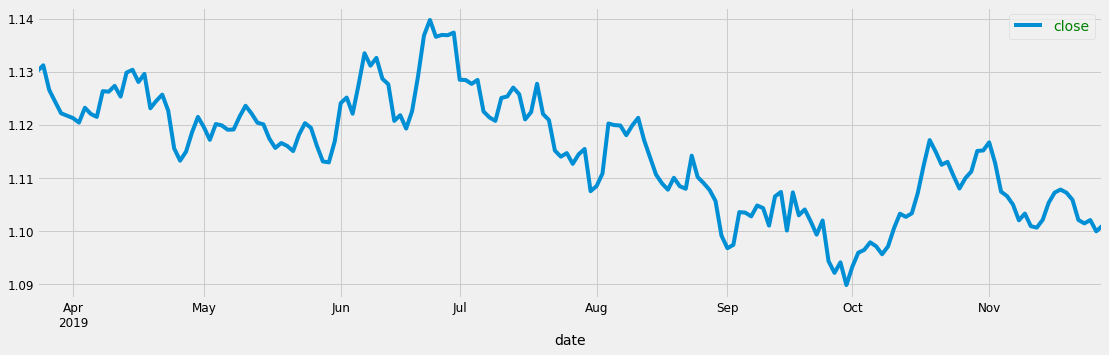

In [178]:
y.plot(figsize=(17,5));

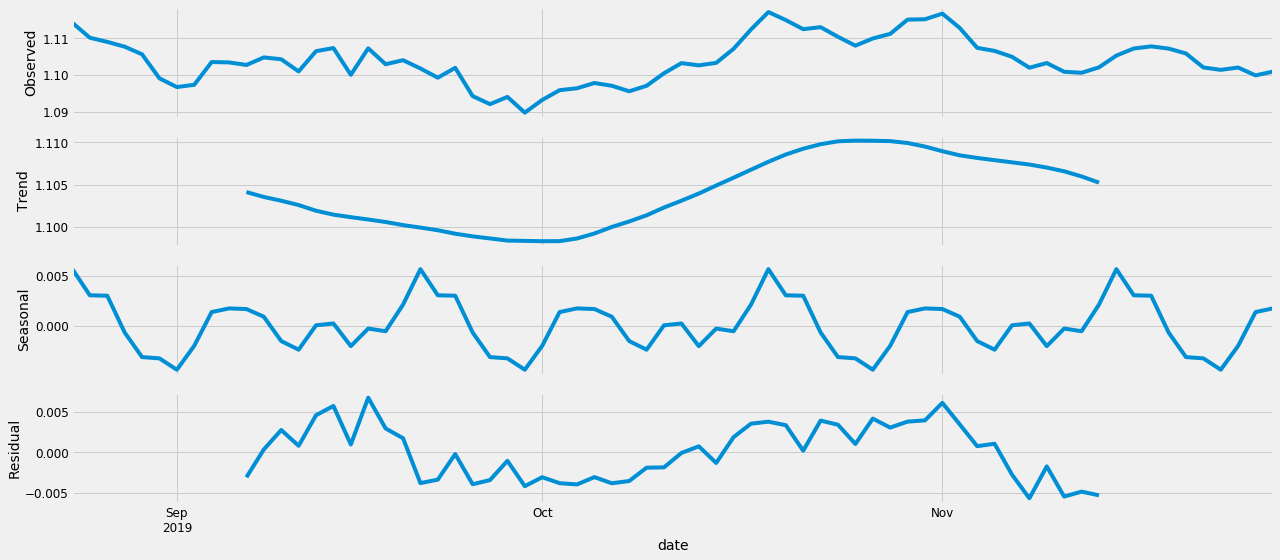

In [162]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df5.close, model='additive', freq=20)
fig = decomposition.plot()
plt.show()

## Parameters Description

### Trend Elements
- p: Trend autoregression order 
- d: Trend difference order
- q: Trend moving average order

### Seasonal Elements
- P: Seasonal autoregressive order
- D: Seasonal difference order
- Q: Seasonal moving average order
- m: The number of time steps for a single seasonal period

In [17]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 60) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 60)
SARIMAX: (0, 0, 1) x (0, 1, 0, 60)
SARIMAX: (0, 1, 0) x (0, 1, 1, 60)
SARIMAX: (0, 1, 0) x (1, 0, 0, 60)


In [179]:
p = 1  # trend autorgression order
d = 3  # trend difference order
q = 3  # trend moving average order

pdq = list((p, d, q))
pdq

[1, 3, 3]

In [180]:
P = 3 # Seasonal autoregressive order
D = 3 # Seasonal difference order
Q = 3 # Seasonal moving average order
m = 10 # The number of time steps for a single seasonal period

seasonal_PDQ = list((P,D,Q,m))
seasonal_PDQ

[3, 3, 3, 10]

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

In [181]:
mod = sm.tsa.statespace.SARIMAX(y,order=pdq,seasonal_order=seasonal_PDQ,enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(pdq,seasonal_PDQ,results.aic))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA[1, 3, 3]x[3, 3, 3, 10]12 - AIC:nan


In [127]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1), # pdq
                                seasonal_order=(1, 1, 1, 5), #seasonal_PDQm
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2366      0.449      0.527      0.598      -0.644       1.117
ma.L1          0.1813      0.464      0.391      0.696      -0.728       1.090
ar.S.L5       -0.6506      0.150     -4.330      0.000      -0.945      -0.356
ma.S.L5       -0.3105      0.190     -1.638      0.101      -0.682       0.061
sigma2      7.582e-06   3.42e-06      2.219      0.027    8.84e-07    1.43e-05


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


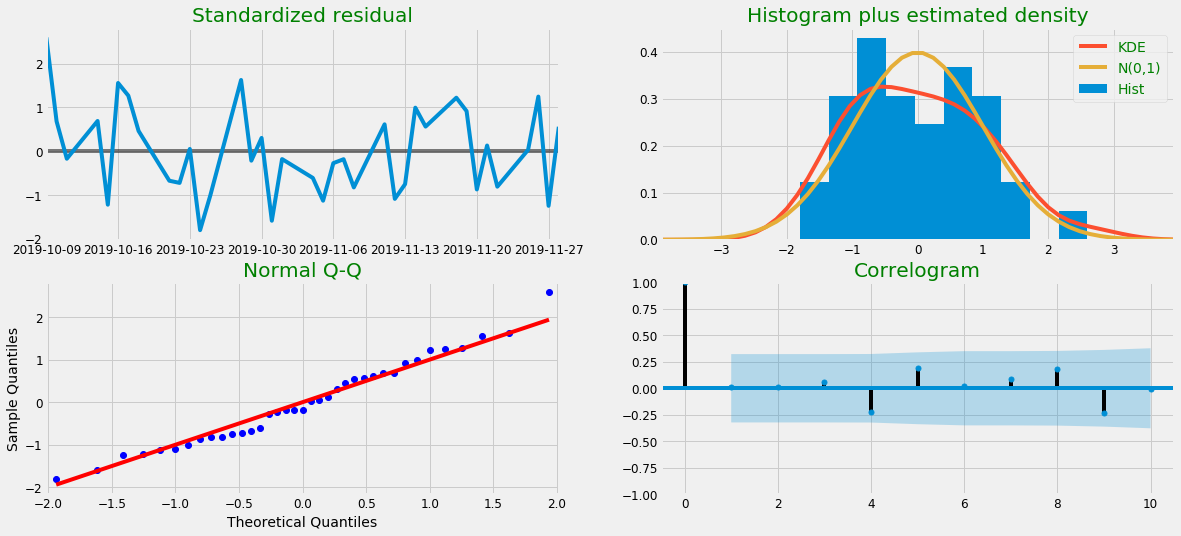

In [128]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [129]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             close   No. Observations:                   50
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 5)   Log Likelihood                 165.369
Date:                           Wed, 18 Dec 2019   AIC                           -320.737
Time:                                   18:23:31   BIC                           -312.682
Sample:                               09-20-2019   HQIC                          -317.897
                                    - 11-28-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2366      0.449      0.527      0.598      -0.644       1.117
ma.L1          0.1813      0.464      0.391      0.696      -0.728       1.090
ar.S.L5       -0.6506      0.150     -4.330      0.000      -0.945      -0.356
ma.S.L5       -0.3105      0.190     -1.638      0.101      -0.682       0.061
sigma2      7.582e-06   3.42e-06      2.219      0.027    8.84e-07    1.43e-05
===================================================================================
Ljung-Box (Q):                       50.74   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.05   Prob(JB):                         0.58
Heteroskedasticity (H):               0.51   Skew:                             0.37
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

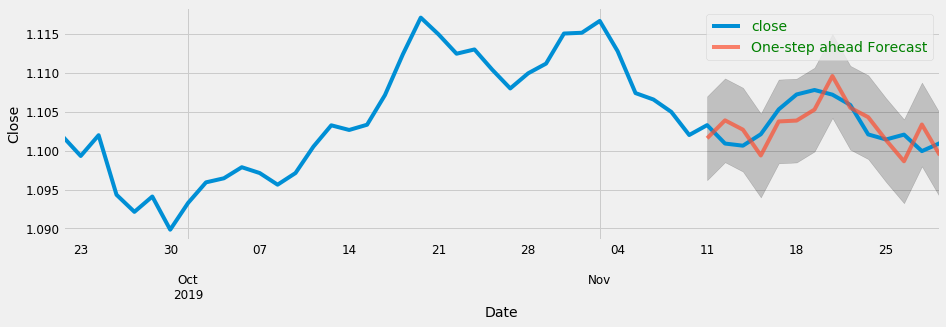

In [136]:
pred = results.get_prediction(start=pd.to_datetime('2019-11-11'), dynamic=False)
pred_ci = pred.conf_int()
ax = y.loc['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.show()

In [137]:
y_forecasted = pred.predicted_mean
y_truth = y.loc['2019-11-11':].close
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 6)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 6)))

The Mean Squared Error is 6e-06
The Root Mean Squared Error is 0.002397


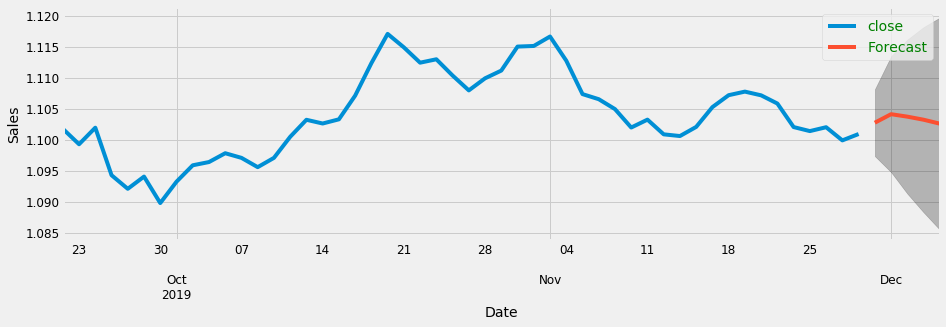

In [139]:
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [141]:
y_forecasted = pred.predicted_mean
y_forecasted.head(5)

date
2019-11-11    1.101606
2019-11-12    1.103916
2019-11-13    1.102714
2019-11-14    1.099386
2019-11-15    1.103774
Freq: B, dtype: float64

In [142]:
y_truth.head(5)

date
2019-11-11    1.103300
2019-11-12    1.100925
2019-11-13    1.100650
2019-11-14    1.102125
2019-11-15    1.105325
Freq: B, Name: close, dtype: float64

In [143]:
pred_ci.head(10)

,lower close,upper close
2019-11-29,1.097406,1.108200
2019-12-02,1.094816,1.113544
2019-12-03,1.091346,1.116221
2019-12-04,1.088328,1.118247
2019-12-05,1.085522,1.119778


In [144]:
pred_ci

,lower close,upper close
2019-11-29,1.097406,1.108200
2019-12-02,1.094816,1.113544
2019-12-03,1.091346,1.116221
2019-12-04,1.088328,1.118247
2019-12-05,1.085522,1.119778
